# Neural Networks
crowdflower
1. Perceptron and Activation
2. Cost Function
3. Gradient Descent
4. X to X
4. Feedforward / Multi Layer Perceptron
5. Convolutional Neural Networks
6. Recurrent Neural Networks
7. Generative Adversarial Neural Networks
8. Deep Reinforcement Learning
9. Auto-Encoers

## 1. Deep Learning
1. A. Multi-Layer Perceptron or MLP
1. B. Perceptron
1. C. FeedForwarding
1. D. Back Propagation

### 1.A. Multi Layer Perceptron
Layers of neurons that are very simple operations. The idea is that cascading operations can actually capture very complex relationships. This is actually diffi
![alt text](https://media.giphy.com/media/26FfhlHI4FSEICwNi/giphy.gif)

![alt text](https://i.stack.imgur.com/2MVdW.png)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np

from keras.utils.vis_utils import plot_model 
from IPython.display import Image

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=0)

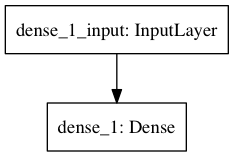

In [3]:
plot_model(model, to_file='model.png')
Image(filename='model.png')

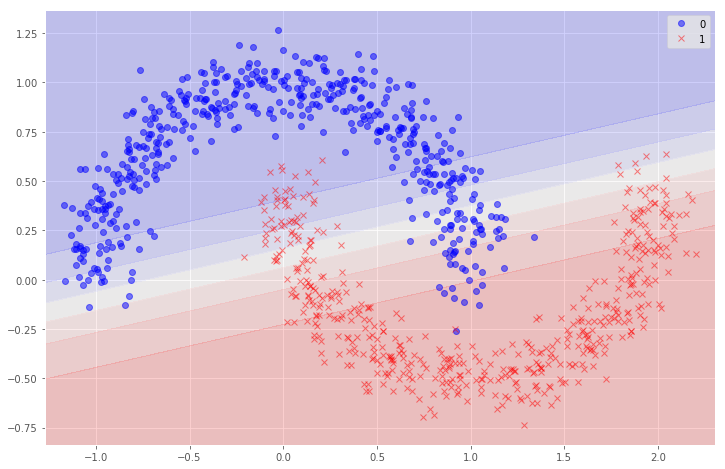

In [29]:
plot_decision_boundary(model, X, y)

In [32]:
model = Sequential()
model.add(Dense(12, input_shape=(2,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

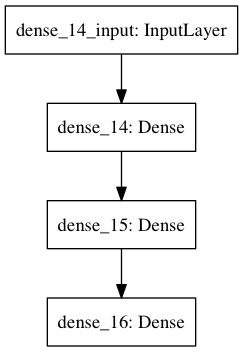

In [33]:
plot_model(model, to_file='model2.png')
Image(filename='model2.png')

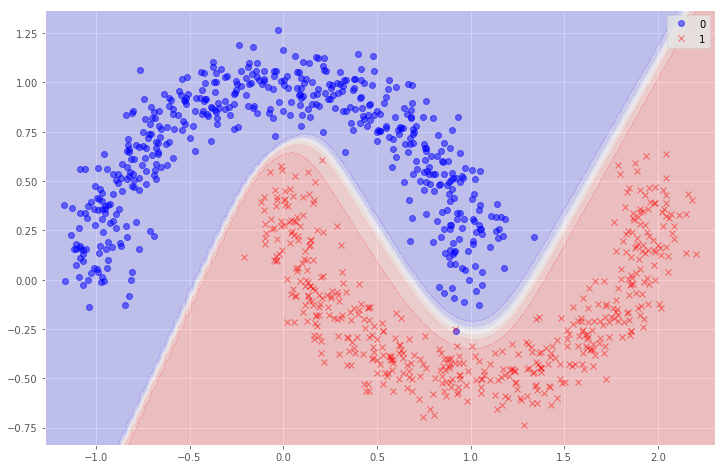

In [34]:
plot_decision_boundary(model, X, y)

# Gradient Descent
Neurons with higher values have more importance. So we will correct these neurons more.
Neurons with low impact are only corrected a little, neurons with high impact are corrected a lot. This gives some intuition on dropout. Because it forces many weights to prove the same thing. many parts of the network reinforce rather than only the same weights every time.

brighter get brighter, dimer get dimer.
Image (Hebbian Theory)

# Back prop
recursively apply this every single weight for the desired output of every single neuron

# Stochastic Gradient Descent
takes a mini batch, adds up the cost and corrects once, because doing gradient descent each time is very costly. Essentially correct with respect to minibatch.